<h2> EXPLORATORY DATA ANALYSIS</H2>



In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('/content/train_data.csv',parse_dates=True,index_col='Date')#,

In [4]:
df_train.rename(columns={'Petrol (USD)':'USD'},inplace=True)

In [5]:
df_train.head()

,USD
Date,
2003-06-09,74.59
2003-06-16,74.47
2003-06-23,74.42
2003-06-30,74.35
2003-07-07,74.28


In [6]:
df_train.index

DatetimeIndex(['2003-06-09', '2003-06-16', '2003-06-23', '2003-06-30',
               '2003-07-07', '2003-07-14', '2003-07-21', '2003-07-28',
               '2003-08-04', '2003-08-11',
               ...
               '2018-10-29', '2018-11-05', '2018-11-12', '2018-11-19',
               '2018-11-26', '2018-12-03', '2018-12-10', '2018-12-17',
               '2018-12-24', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=813, freq=None)

<h4> Set Monthly frquency</h4>

In [7]:
df_train2= df_train.copy()
df_train2 = df_train2.resample('MS').sum()
df_train2.index

DatetimeIndex(['2003-06-01', '2003-07-01', '2003-08-01', '2003-09-01',
               '2003-10-01', '2003-11-01', '2003-12-01', '2004-01-01',
               '2004-02-01', '2004-03-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Date', length=187, freq='MS')

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_train2['USD'],model='mul',period=12)
seasonal = result.seasonal
trend = result.trend

<h2> SEASONALITY</H2>

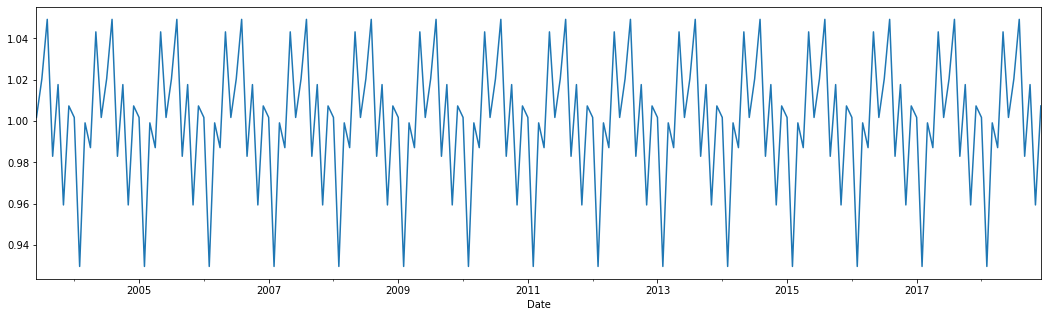

In [14]:
seasonal.plot(figsize=(18,5))

We see the a strong presence of seasonality component 

<h2>TREND

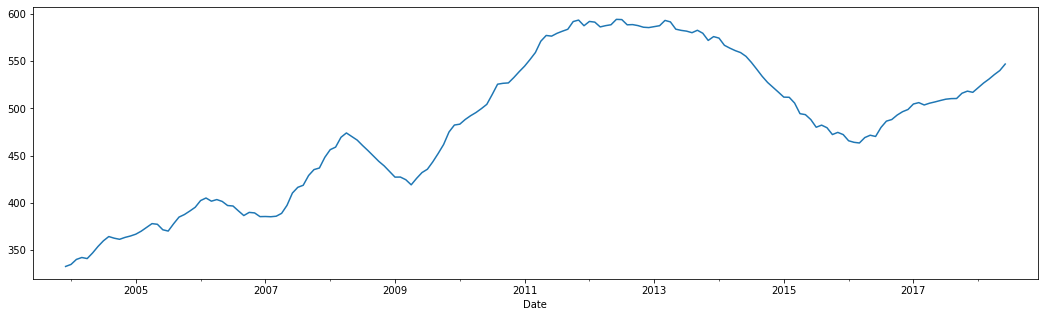

In [10]:
trend.plot(figsize=(18,5));

We see an increasing trend.For further analysis we will use Ploty library

In [22]:
import plotly.graph_objects as go
data = [
    go.Scatter(
        x=df_train2.index,
        y=df_train2['USD'],
        mode="lines+markers",
        name="closing price",
        line=dict(color="#1f77b4"),
    )
]
# Let plotly pick the best date format.
layout = go.Layout(
    title={"text": "Petrol Prices(USD)"},
    xaxis={"title": "Time"},
    yaxis={"title": "US $"},
)
 
go.Figure(data=data, layout=layout)

We clearly see an increasing trend,almost doubling  from USD 297 in 2003 to USD 603 in 2018.The highest price recorded(USD 707) was April 2012 and the lowest(USD 256) in November 2006

<h2> Entire Plot

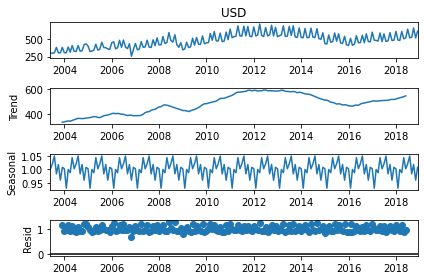

In [14]:
result.plot();

<h2> Month Plot

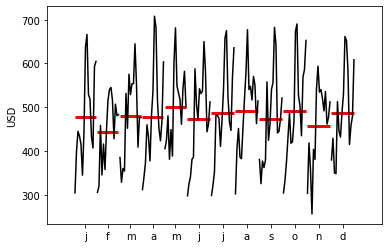

In [15]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df_train2['USD'],ylabel='USD');

<H2> check for outliers </H2>

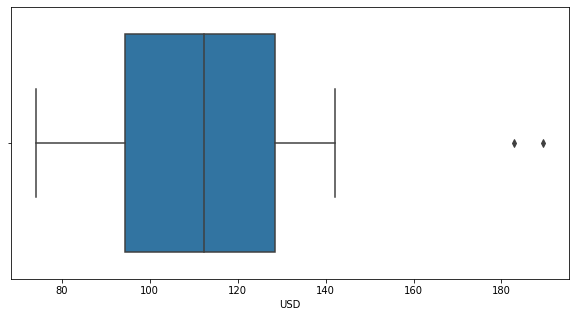

In [19]:
fig = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x=df_train['USD'],whis=1.5)

We find only two outlier records

# Checking for Missing Value

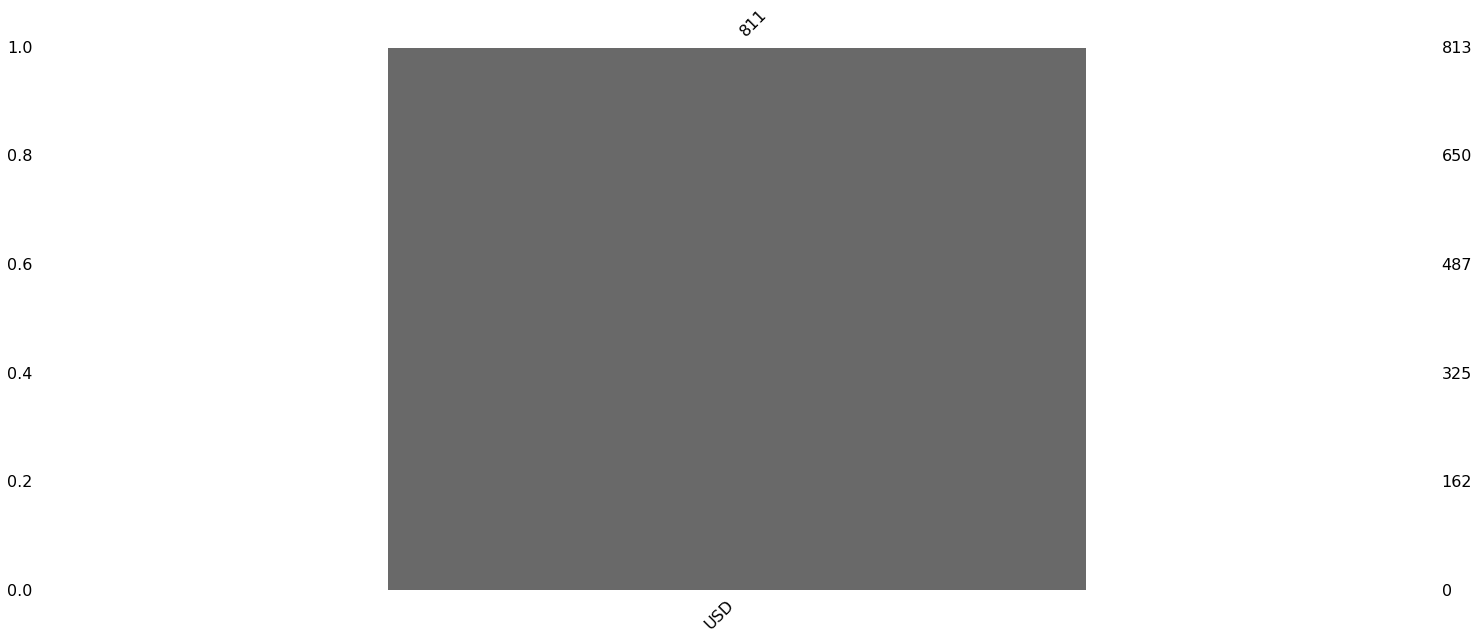

In [23]:
import missingno as msno
msno.bar(df_train)

We find two records are missing

<h2> STATIONARITY CHECK

In [15]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [16]:
adf_test(df_train['USD'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.043397
p-value                   0.267875
# lags used               6.000000
# observations          804.000000
critical value (1%)      -3.438510
critical value (5%)      -2.865142
critical value (10%)     -2.568688
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
